<!-- <div style="background:#222222; color:#ffffff; padding:20px"> -->
<h1 align="center">Guided ML With The Iris Dataset</h1>

<h2 align="center" tyle="color:#01ff84" >Learning type | Activity type | Objective |</h2>
<h2 align="center">| Supervised | Multiclass classification | Identify a flower's class |</h2>


<div>

Contents:

1. Loading the data
2. Setting up supervised learning problem (selecting features)
3. Creating a first model
    - Creating train and test datasets
    - Normalizing train and test
    - Fitting and predicting
4. Evaluate the frist model predictions
5. Crossvalidation of the model
6. Creating an end to end ML pipeline
    - Train/Test Split
    - Normalize
    - Crossvalidations
    - Model
    - fitting and predicting

## Instructions with NBGrader removed

Complete the cells beginning with `# YOUR CODE HERE` and run the subsequent cells to check your code.


Contents:
1. Loading the data
2. Setting up supervised learning problem (selecting features)
3. Creating a first model
    - Creating train and test datasets
    - Normalizing train and test
    - Fitting and predicting
4. Evaluate the frist model predictions
5. Crossvalidation of the model
6. Creating an end to end ML pipeline
    - Train/Test Split
    - Normalize
    - Crossvalidations
    - Model
    - fitting and predicting

## About the dataset

[Iris](https://archive.ics.uci.edu/ml/datasets/iris) is a well-known multiclass dataset. It contains 3 classes of flowers with 50 examples each. There are a total of 4 features for each flower.

![](./classic-datasets/images/Iris-versicolor-21_1.jpg)

## Package setups

1. Run the following two cells to initalize the required libraries. 

In [1]:
#to debug package errors
import sys
sys.path
sys.executable

'/usr/local/bin/python'

In [2]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

## Step 1: Loading the data

1. Load the iris dataset using ```datasets.load_iris()```
2. Investigate the data structure with ```.keys()```
3. Construct a dataframe from the dataset
4. Create a 'target' and a 'class' column that contains the target names and values
5. Display a random sample of the dataframe 

In [3]:
def load_data():
    #load the dataset
    data = datasets.load_iris()
    #return the dataset
    return data

In [4]:
# assert load_data()['data'].shape == (150,4)

In [5]:
dataset = load_data()
load_data().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
def dataset_to_pandas():
    #put the dataset into a pandas DF using the feature names as columnsç
    #rename the column name so the dont include the '(cm)'
    #add 2 columns one with the target and another with the target_names
    
    df = pd.DataFrame(dataset.data, columns = ['sepal length','sepal width','petal length','petal width'])
    df['target'] = dataset.target
    target_names = dataset.target_names
    df['class'] = df['target'].replace({0: target_names[0],1: target_names[1], 2 : target_names[2]})
    return df

In [7]:
dataset_to_pandas()

,sepal length,sepal width,petal length,petal width,target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [8]:
# df = dataset_to_pandas()
# assert df['sepal length'].shape == (150,)
# assert df['sepal width'].shape == (150,)
# assert df['petal length'].shape == (150,)
# assert df['petal width'].shape == (150,)
# assert df['target'].shape == (150,)
# assert df['class'].shape == (150,)


### Question
Find the X and y values we're looking for. Notice that y is categorical and thus, we could **one-hot encode it** if we are looking at **class** or we can just pick **target**. In order to one hot encode we have  to re-shape `y` it using the **.get_dummies** function. 

## For the purpose of this exercise, do not use hot encoding, go only for target but think about if you have to drop it somewhere or not...

In [9]:
df_iris = dataset_to_pandas()

In [10]:
def ohe():
    df_iris
    df_iris[0] = np.where(df_iris['target'] == 0, 1,0) 
    df_iris[1] = np.where(df_iris['target'] == 1, 1,0)
    df_iris[2] = np.where(df_iris['target'] == 2, 1,0)
    df_iris.drop('class', axis=1, inplace=True)
    return df_iris
# first check for value(1), second if true get one if false get 0

In [11]:
ohe_data = ohe()

# assert ohe_data.shape == (150,8)

In [11]:
df_iris

,sepal length,sepal width,petal length,petal width,target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## Step 2: Setting up supervised learning problem (selecting features)

Feature selection is an essential step in improving a model's perfromance. In the first version of the model we will use the **'sepal length'** and **'sepal width'** as predicting features. Later we will see the effect of adding additional features.

1. Assign the values of the 'target' to Y as a numpy array
2. Assign the remaining feature values to X as a numpy array
3. Check the shape of X and Y. Check the first few values.
    - Can we confirm our X and Y are created correctly?

In [12]:
def target_to_numpy():
    Y = np.array(df_iris['target'])
    return Y
    
def data_to_numpy():
    X = np.array(df_iris[['sepal length','sepal width']])
    return X

In [13]:
Y = target_to_numpy()
X = data_to_numpy()
assert isinstance(Y, np.ndarray)
assert isinstance(X, np.ndarray)
assert X.shape == (150,2)

In [14]:
X = df_iris[['sepal length', 'sepal width']].values
print(X.shape)
X[:5]

(150, 2)


array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

## Step 3: Creating the first model

In lecture we learned about creating a train and test datasets, normalizing, and fitting a model. In this step we will see how to build a simple version of this.

We have to be careful when constructing our train and test datasets. First, when we create train and test datasets we have to be careful that we always have the same datapoints in each set. Otherwise our results won't be reproduceable or we might introduce a bias into our model.

We also need to be attentive to when we normalize the data. What would be the effect of normalizing the data (i.e. with StandardScaler to a range between 0 - 1) before we create our train and test sets? Effectively we would use information in the test set to structure the values in the training set and vice versa. Therefore normalizing train and test independently is the preferred method.

1. Create X_train, X_test, Y_train, Y_test using ```train_test_split()``` with an 80/20 train/test split. Look in the SKLearn documentation to understand how the function works.
    - Inspect the first few rows of X_train.
    - Run the cell a few times. Do the first few rows change?
    - What option can we use in ```train_test_split()``` to stop this from happening?
2. Normalize the train and test datasets with ```StandardScaler```
    - We can fit the transform with ```.fit()``` and ```.transform()``` to apply it. Look in the documentation for an esample of how to do this.
    - Does it make sense to normalize Y_train and Y_test?
3. Initalize a ```LogisticRegression()``` model and use the ```.fit()``` method to initalize the first model.
    - We will pass the X_train and Y_train variables to the ```.fit()``` method.
    - Once the model is fit, use the ```.predict()``` with the X_test and save the output as predictions.

In [16]:
df_iris.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'target',
       'class'],
      dtype='object')

In [18]:
#split train and test data 80/20
# X_train, X_test, Y_train, Y_test = 0,0,0,0
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y,test_size=0.2,random_state=42)


print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(120, 2)
(120,)
(30, 2)
(30,)


In [17]:
# assert X_train.shape == (120,2)
# assert Y_train.shape == (120,)
# assert X_test.shape  == (30,2)
# assert Y_test.shape  == (30,)

In [19]:
X_train[0]

array([4.6, 3.6])

In [20]:
#normalize the dataset
# create and fit the scaler object on the training data
scaler = StandardScaler()
# In sklearn.preprocessing.StandardScaler(), centering and scaling happens independently on each feature.

X_train = scaler.fit_transform(X_train)

#create and fit the scaler object on the training data

X_test = scaler.fit_transform(X_test)

X_train[:5]

array([[-1.47393679,  1.20365799],
       [-0.13307079,  2.99237573],
       [ 1.08589829,  0.08570939],
       [-1.23014297,  0.75647855],
       [-1.7177306 ,  0.30929911]])

In [21]:
np.max(X_train)

2.9923757343597126

In [29]:
# assert np.amin(X_train) >= -2.5
# assert np.amax(X_train) <= 3.2
# assert np.amin(X_test) >= -2
# assert np.amin(X_test) <= 2.75

AssertionError: 

In [22]:
#initalize and fit with Logistic Regression
prediction = 0
#initalize the logistic regressor
clf = LogisticRegression(random_state=42).fit(X_train, Y_train)
#make predictions
predictions = clf.predict(X_test)
print(predictions)


[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 1 0 1 0 1 2 2 2 2 0 0]


In [24]:
# assert predictions.shape == (30,)

## Step 4: Evaluate the frist model's predictions

We will learn more about how to evaluate the performance of a classifier in later lessons. For now we will use % accuracy as our metric. It is important to know that this metric only helps us understand the specific performance of our model and not, for example, where we can improve it, or where it already perfoms well.

1. Use ```.score()``` to evaluate the performance of our first model.

In [23]:
score = 0
#evaluating the performace of our first model
score = clf.score(X_train,Y_train)
print(score)



0.7916666666666666


In [ ]:
# assert score >=0.7

In [ ]:
# assert score >=0.72

In [ ]:
# assert score >=0.73

## Step 5: Crossvalidation of the model
Our first model achived ~90% accruacy. This is quite good. How do we know it is reproducable? If we run the model again and our performance is 85% which is correct? And what about improving our model? Can you think of one thing we can do to potentially improve the model?

#### Crossvalidation
Corssvalidation is when we create multiple X and Y datasets. On each dataset we train and fit the model. We then average the results and return a 'crossvalidated' accruacy.

1. Initalize a new version of the model you trained above with the same paramters.
2. Use ```cross_validate()``` to run the model with 5 crossvalidation folds. 

In [24]:
#model with cross validation

#cross validate the training set
clf_cv = 0
CV = 0
cv = cross_validate(clf, X_train, Y_train, cv=5)


def print_scores(cv):
    #print out cross validation scores
    [print('Crossvalidation fold: {}  Accruacy: {}'.format(n, score)) for n, score in enumerate(cv['test_score'])]
    #print out the mean of the cross validation
    print('Mean train cross validation score {}'.format(cv['test_score'].mean()))
    
print_scores(cv)

Crossvalidation fold: 0  Accruacy: 0.7083333333333334
Crossvalidation fold: 1  Accruacy: 0.75
Crossvalidation fold: 2  Accruacy: 0.875
Crossvalidation fold: 3  Accruacy: 0.8333333333333334
Crossvalidation fold: 4  Accruacy: 0.75
Mean train cross validation score 0.7833333333333334


In [ ]:
# assert len(cv['test_score']) == 5
# assert max(cv['test_score']) >= 0.85
# assert min(cv['test_score']) >= 0.69
# assert cv['test_score'].mean() >= 0.77

## Step 6: Creating an end to end ML pipeline
Congraulations you've trained, crossvalidated, predicted, and evaluated your frist classifier. Now that you understand the basic steps we will look at a way to combine all these steps together.

Before we go further think about what you would have to do if you wanted to change the model. Intalize a new model, change the vairables, redo the cross validation...etc. Seems like a lot. And when we have to change lots of code it is easy to make mistakes. And what if you wanted to try many models and see which one performed best? Or try changing many different features? How could you do it without writing each one out as we have?

The solution is to use SKLearn's pipeline class. A pipeline is an object that will execute the various steps in the machine learning process. We can choose what elements we want in the pipeline and those that we do not. Once setup, we can rapidly change models, or input data and have it return our results in an ordered way.


1. Initalize a scaler and a classifer object like we did previously.
2. Use the ```make_pipeline()``` function to construct a transofmraiton pipeline for the scaler and the classifier
3. Input the pipeline object to the cross_validator and evaluate with 5 folds.
4. Print out your results (hint: make a function for repetitve tasks like printing)

In [25]:
scaler = 0
classifier = 0
pipe = 0
scores = 0

#define the scaler
scaler = StandardScaler()
#define the classifier
classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial')
#make the pipeline
# pipe = make_pipeline(StandardScaler(),LogisticRegression)
pipe = make_pipeline(scaler, classifier)
#run the cross validation
scores = cross_validate(pipe, X, Y, cv=5)

In [26]:
#print results
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(multi_class='multinomial'))])

In [27]:
#print results
scores

{'fit_time': array([0.00689077, 0.00582051, 0.0093534 , 0.00951743, 0.00948763]),
 'score_time': array([0.00057364, 0.0004251 , 0.00072122, 0.0006566 , 0.0006988 ]),
 'test_score': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.86666667])}

## Challenge Exercise

In this notebook we only used two features to predict the class of the flower. We also did not do any hypter parameter tuning. The challenge is to impove the prediction results. Some ideas we can try:
1. Add features to the input and run the cross validation pipeline
2. Investigate how to use ```GridSearchCV```, a powerful funtion that searches through hyperparmetrs and does cross validation.
    - Hint: Input the pipeline directly into GridSearchCV
3. Try a different models like RandomForest or SVM.

In [28]:
df_iris.head()

,sepal length,sepal width,petal length,petal width,target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [29]:
set(df_iris.target)

{0, 1, 2}

In [32]:
y = df_iris.target
X = df_iris.drop(['target', 'class'], axis=1)

Initalize a DecisionTreeClassifier() model and use the .fit() method to initalize the first model.
We will pass the X_train and Y_train variables to the .fit() method.
Once the model is fit, use the .predict() with the X_test and save the output as predictions.
Then compare the predictions to y_test

## Decision Trees

#### Iris Data

In [67]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [79]:
# Decision Trees - Classifier on Iris Data
#train test split - then we fit on x train - predict on x test and compare y test to y predict
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
sum((y_test-pred) == 0) / len(pred)

0.9666666666666667

In [78]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.9666666666666667


[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

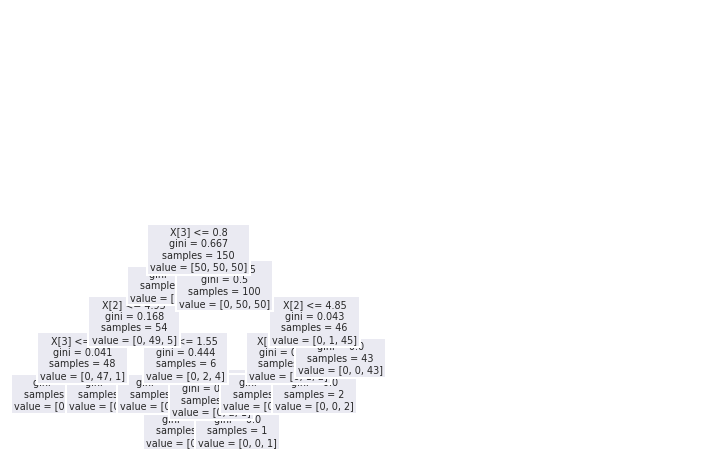

In [45]:
tree.plot_tree(clf)

## test

In [92]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)
df_iris = load_iris()
cross = cross_val_score(clf, df_iris.data, df_iris.target, cv=50)
cross

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.66666667, 0.66666667, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.66666667,
       0.66666667, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.66666667, 1.        , 0.66666667,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [87]:
import numpy as np
a = np.mean(cross)
a

0.9466666666666665

## Decision Trees

#### Zoo data

In [106]:
#load data
df_zoo = pd.read_csv('/work/zoo.csv')

In [108]:
df_zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [112]:
y = df_zoo.class_type
X = df_zoo.drop(['class_type','animal_name'], axis=1)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
sum((y_test-pred) == 0) / len(pred)

0.9523809523809523

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=93b95208-6978-4cc9-bd04-78d290558c98' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>